# Foundations of AI & ML
## Session 05
### Experiment 1 - Part 6
# Effect of LR Decay

**Objectives:** Here you will see how to vary the learning rate and observe the phenomenon of oscillation around the optimal value, and the effect of decreasing learning rate.

**Expected Time:** This Experiment should take around 15 mins

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Read the data

In [2]:
data = pd.read_csv("../Datasets/regr01.txt", sep=" ", header=None, names=['l', 't'])
print(data.head())
print(data.tail())

      l        t
0  0.10  0.69004
1  0.11  0.69497
2  0.12  0.74252
3  0.13  0.75360
4  0.14  0.83568
       l       t
85  0.95  1.9841
86  0.96  2.0066
87  0.97  2.0493
88  0.98  2.0503
89  0.99  2.0214


In [3]:
l = data['l'].values
t = data['t'].values
tsq = t * t

# Vanilla/Batch Gradient Descent

In [4]:
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

def train_on_all(x, y, m, c, eta, iterations=1000):
    for steps in range(iterations):
        m, c, err = train(x, y, m, c, eta)
    return m, c, err

# Effect of varying LR on error and final line

Let us vary LR and find how the error decreases in each case, and how the final line looks, by training each case for the same nuber of iterations - 2000.

### $\eta$ = 0.1

In [5]:
# Save errors
errs_1 = []
m, c = 0, 0
eta = 0.1
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_1.append(error)

# Save final line
m_1, c_1 = m, c

In [6]:
eta, m_1, c_1, len(errs_1)

(0.1, 4.1414844631045575, 0.07358041685220443, 2000)

### $\eta$ = 0.01

In [7]:
errs_01 = []
m, c = 0, 0
eta = 0.01
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_01.append(error)

# Save final line
m_01, c_01 = m, c

### $\eta$ = 0.001

In [8]:
errs_001 = []
m, c = 0, 0
eta = 0.001
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta) # We will plot the value of for every 100 iterations
    errs_001.append(error)

# Save final line
m_001, c_001 = m, c

### $\eta$ = 0.0001

In [9]:
errs_0001 = []
m, c = 0, 0
eta = 0.0001
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta) # We will plot the value of for every 100 iterations
    errs_0001.append(error)

# Save final line
m_0001, c_0001 = m, c

## Plot of lines vs $\eta$

In [10]:
# Find the lines
y_1 = m_1 * l + c_1
y_01 = m_01 * l + c_01
y_001 = m_001 * l + c_001
y_0001 = m_0001 * l + c_0001

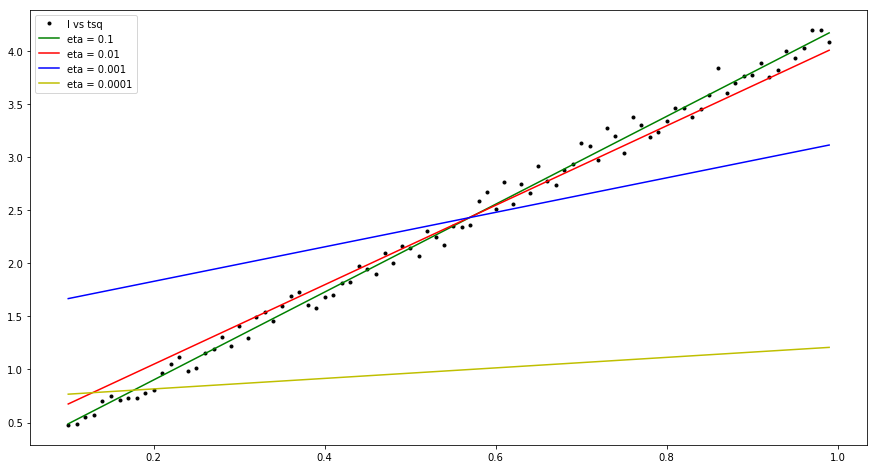

In [11]:
plt.figure(figsize=(15, 8))
plt.plot(l, tsq, '.k')
plt.plot(l, y_1, "g")
plt.plot(l, y_01, "r")
plt.plot(l, y_001, "b")
plt.plot(l, y_0001, "y")
plt.legend(["l vs tsq","eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

Thus, we see that higher learning rates reach the best fit faster than lower learning rates (obviously).

## Plot of errors vs epochs for each $\eta$

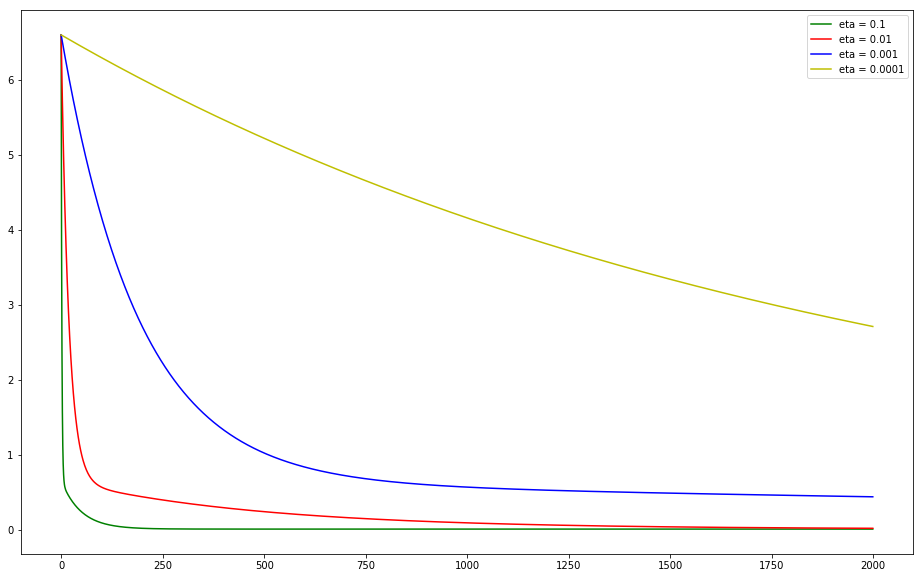

In [12]:
epochs = range(0,2000)
plt.figure(figsize=(16,10))
plt.plot(epochs, errs_1, "g")
plt.plot(epochs, errs_01,"r")
plt.plot(epochs, errs_001,"b")
plt.plot(epochs, errs_0001,"y")
plt.legend(["eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

# With LR Decay

In some cases, the learning rate might be too high to give good fitting lines. For example, let us train with constant LR of 0.8 and get the final line after 1000 iterations:

### $\eta$ = 0.8

In [16]:
errs = []
m, c = 0, 0
eta = 0.8
for times in range(1000):
    m, c, error = train(l, tsq, m, c, eta)
    errs.append(error)
    
m_normal, c_normal = m, c

Let us see the plot of error vs iterations:

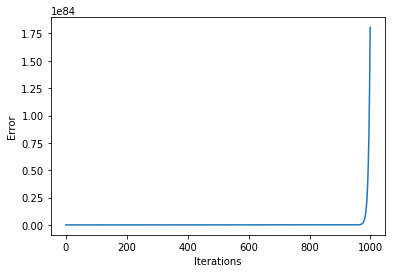

In [17]:
plt.plot(range(len(errs)), errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

We see that the error quickly goes to almost 0, but after some iterations blows up.

Let us check the "best fit" line that is found:

In [18]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_normal, c_normal, errs[-1]))

m = -6.43359e+41 c = -1.1198e+42 Error = 1.80675e+84


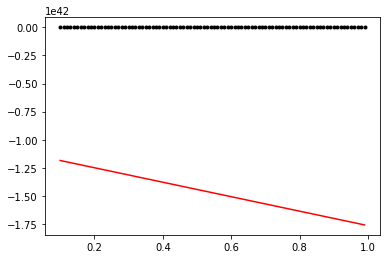

In [19]:
y = m_normal * l + c_normal 
plt.plot(l, tsq, '.k')
plt.plot(l,y,"r")
plt.show()

Clearly this is not ideal.

This was a simple case where we can see the learning rate is too high. There might be cases where it is not so simple to identify this. Also, having a low learning rate is not good because training time would be too high!

**Solution: Decay the learning rate.**

Now let us train another model with decaying lr. But let us not decay lr below 0.0001.

In [20]:
errs_decay = []
m, c = 0, 0
eta = 0.5
decay_factor = 0.99
for iteration in range(1000):
    eta = max(0.0001, eta * decay_factor)
    m, c, error = train(l, tsq, m, c, eta)
    errs_decay.append(error)

m_decay, c_decay = m, c

In [21]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_decay, c_decay, errs_decay[-1]))

m = 4.12371 c = 0.0837925 Error = 0.00708933


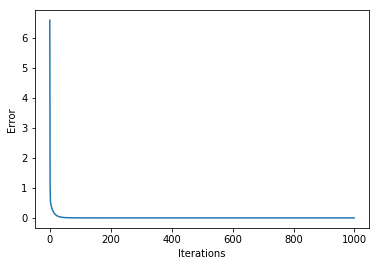

In [22]:
plt.plot(range(len(errs_decay)), errs_decay)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

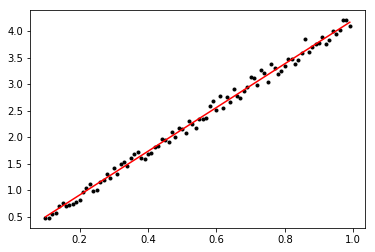

In [23]:
y = m_decay * l + c_decay 
plt.plot(l, tsq, '.k')
plt.plot(l,y,"r")
plt.show()

Thus, this is correct.